## Import libraries

In [1]:
import pandas as pd # data science library o manipulate data
import numpy as np
import matplotlib.pyplot as plt # visualization library
import seaborn as sb #visualization library specific for data science, based on matplotlib 
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm
import pickle

# Cleaning Data and Preparation

## Importing data files

In [2]:
# Merge the data
data = pd.read_csv('data_clean_china.csv')
data = data.set_index('date')
data = data.loc[:2018]
data

,Kilotons of Co2,Population,GDP (Billions of $US),GDP Growth (%),GDP Per Capita (US $),Inflation (%),kWh per Capita,Renewables (% equivalent primary energy)
date,,,,,,,,
1990,2.173360e+06,1153704252,974.429258,3.9203,317.8847,3.1,511,4.723668
1991,2.302180e+06,1170626171,1086.530756,9.2628,333.1421,3.4,549,4.424778
1992,2.418180e+06,1183813389,1254.764538,14.2245,366.4607,6.4,605,4.412702
1993,2.645410e+06,1195855558,1446.231016,13.8837,377.3898,14.7,663,4.757861
1994,2.767670e+06,1207286675,1651.115180,13.0368,473.4923,24.1,727,4.952474
1995,3.088620e+06,1218144426,1850.763485,10.9540,609.6567,17.1,770,5.553820
1996,3.070510e+06,1228298836,2050.191538,9.9226,709.4138,8.3,821,5.143133
1997,3.134110e+06,1237801448,2255.387151,9.2368,781.7442,2.8,853,5.361734
1998,3.236280e+06,1246836105,2437.344683,7.8460,828.5805,-0.8,871,5.427778


# Explore Data

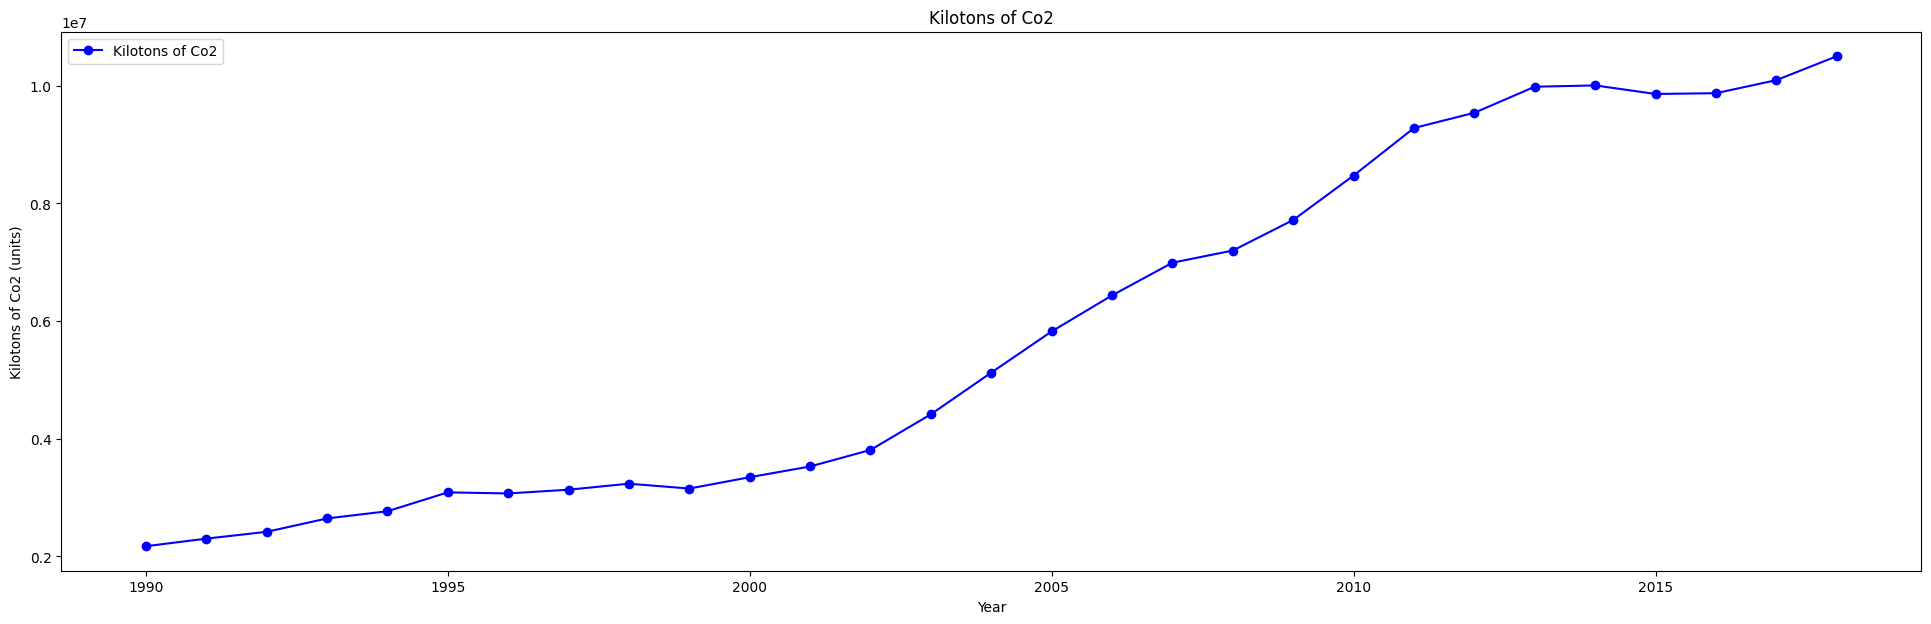

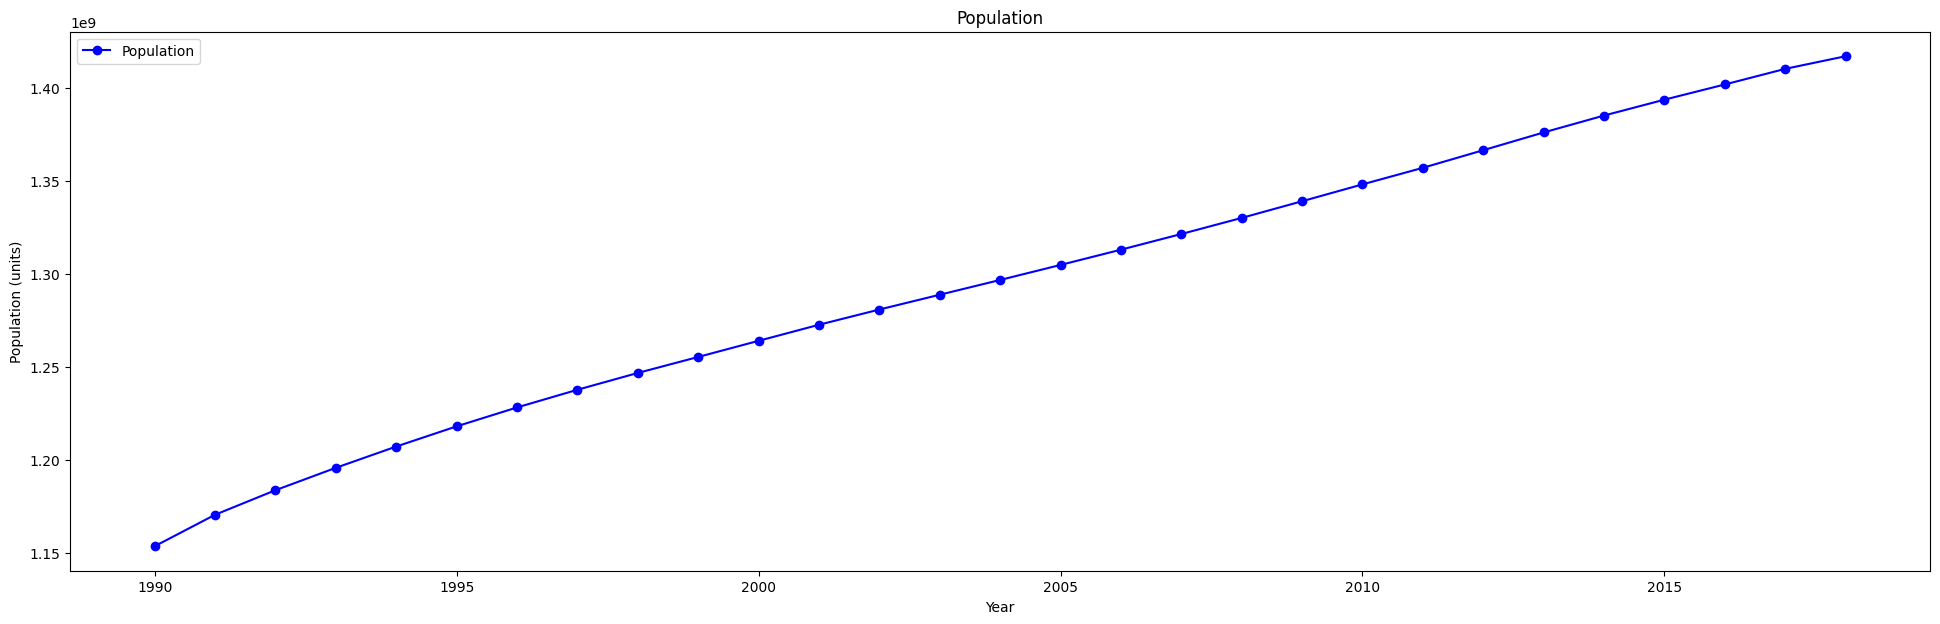

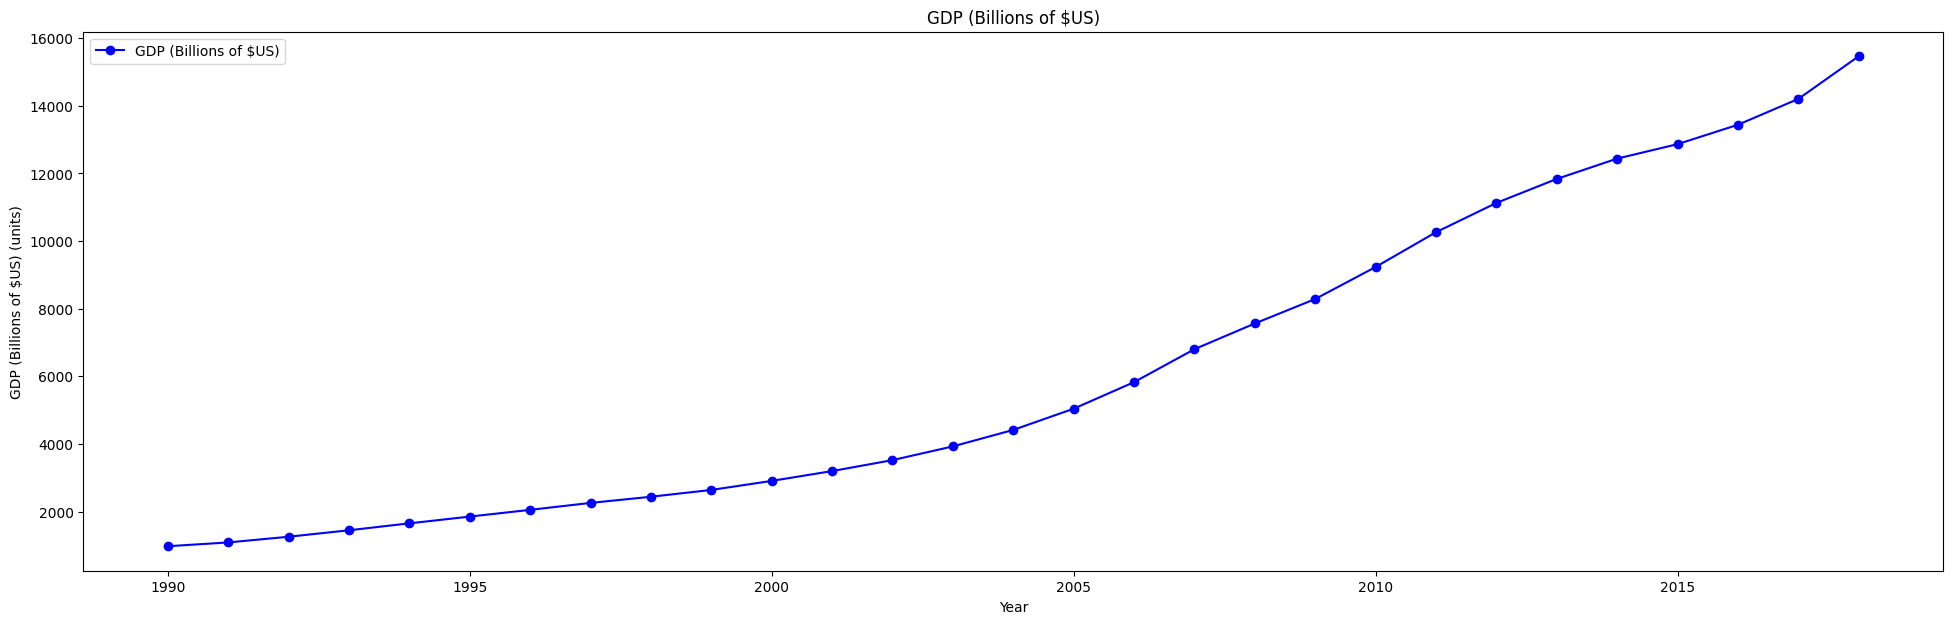

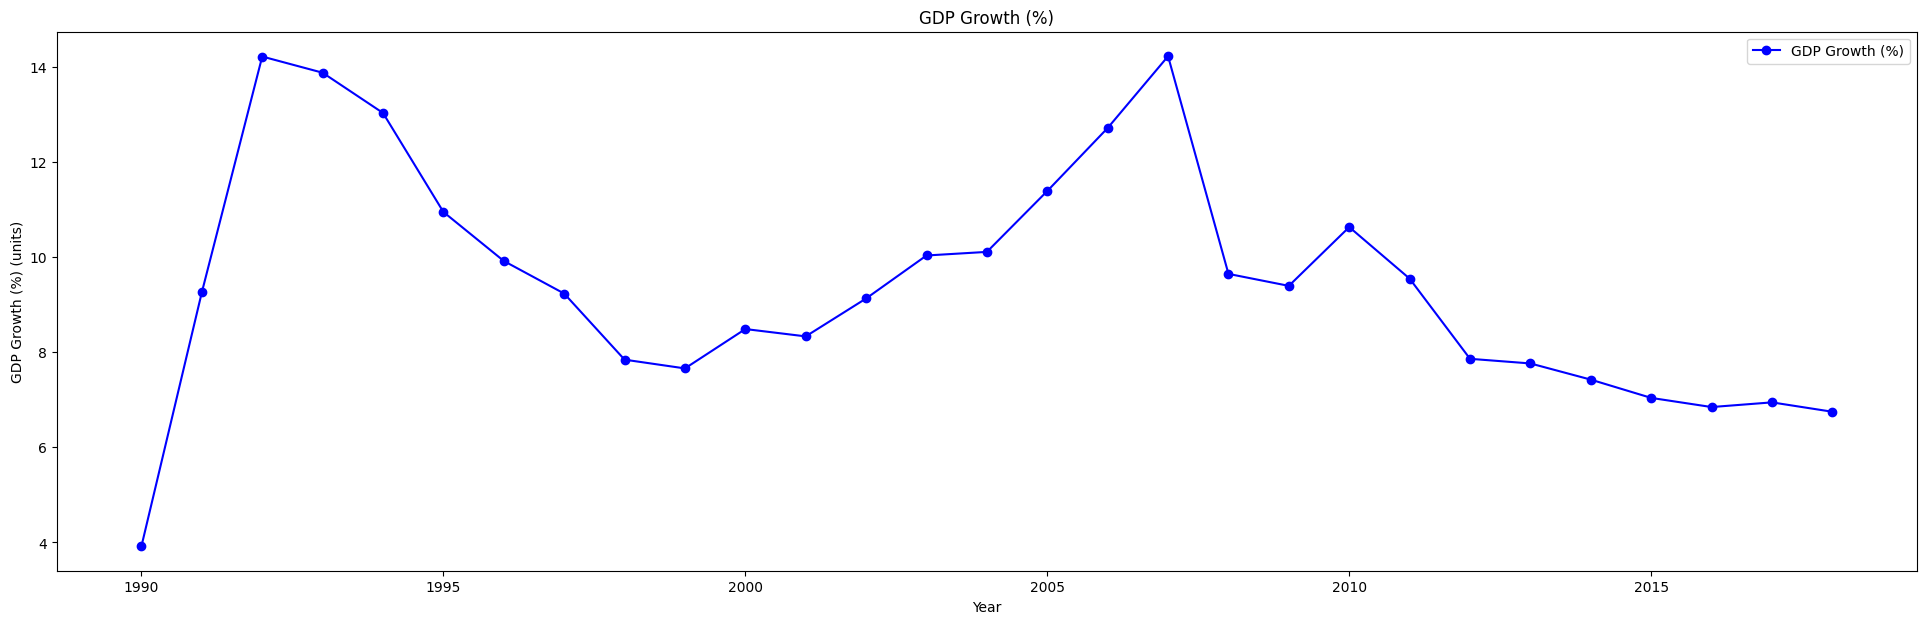

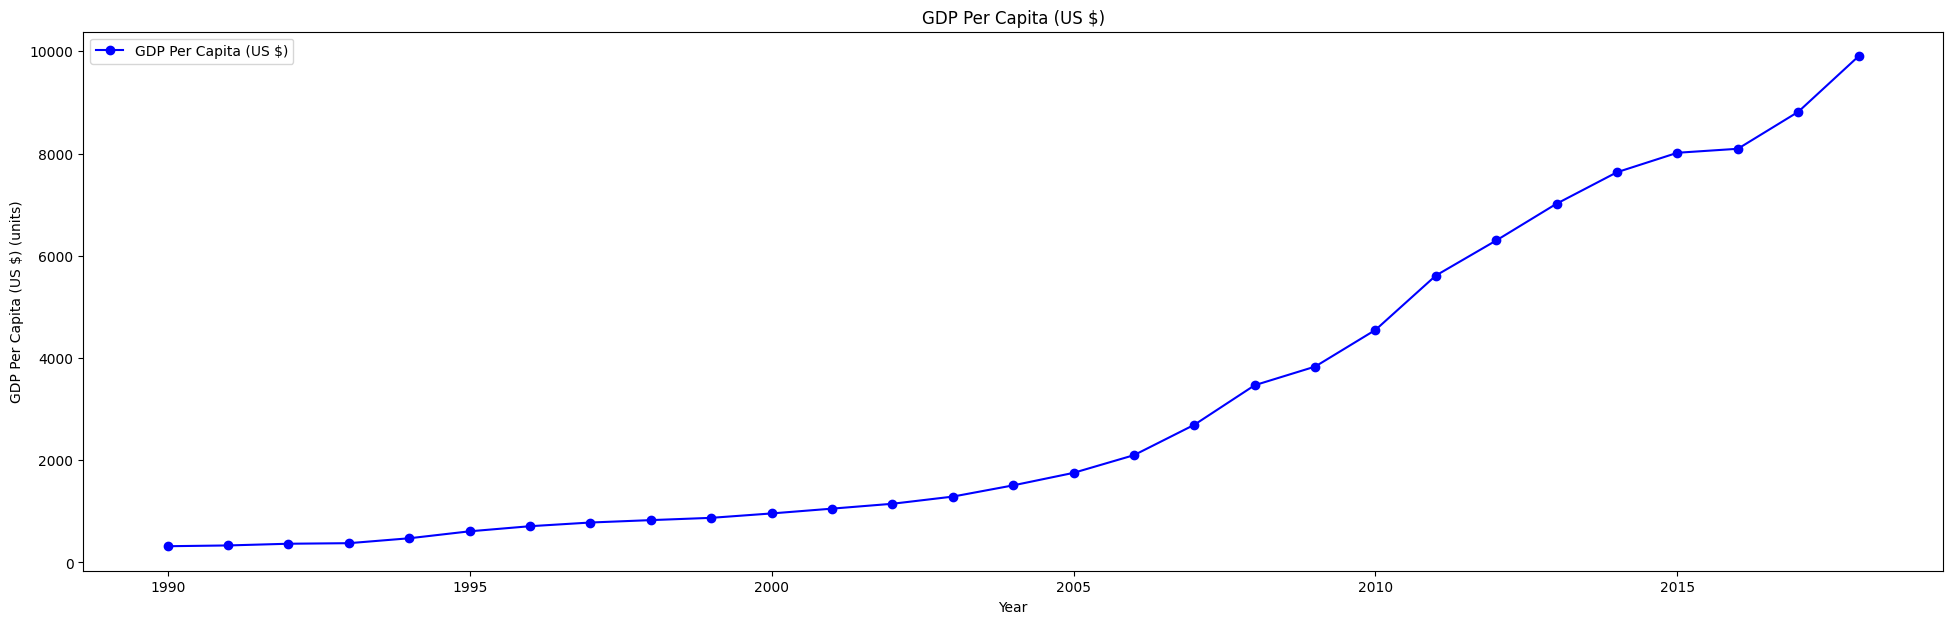

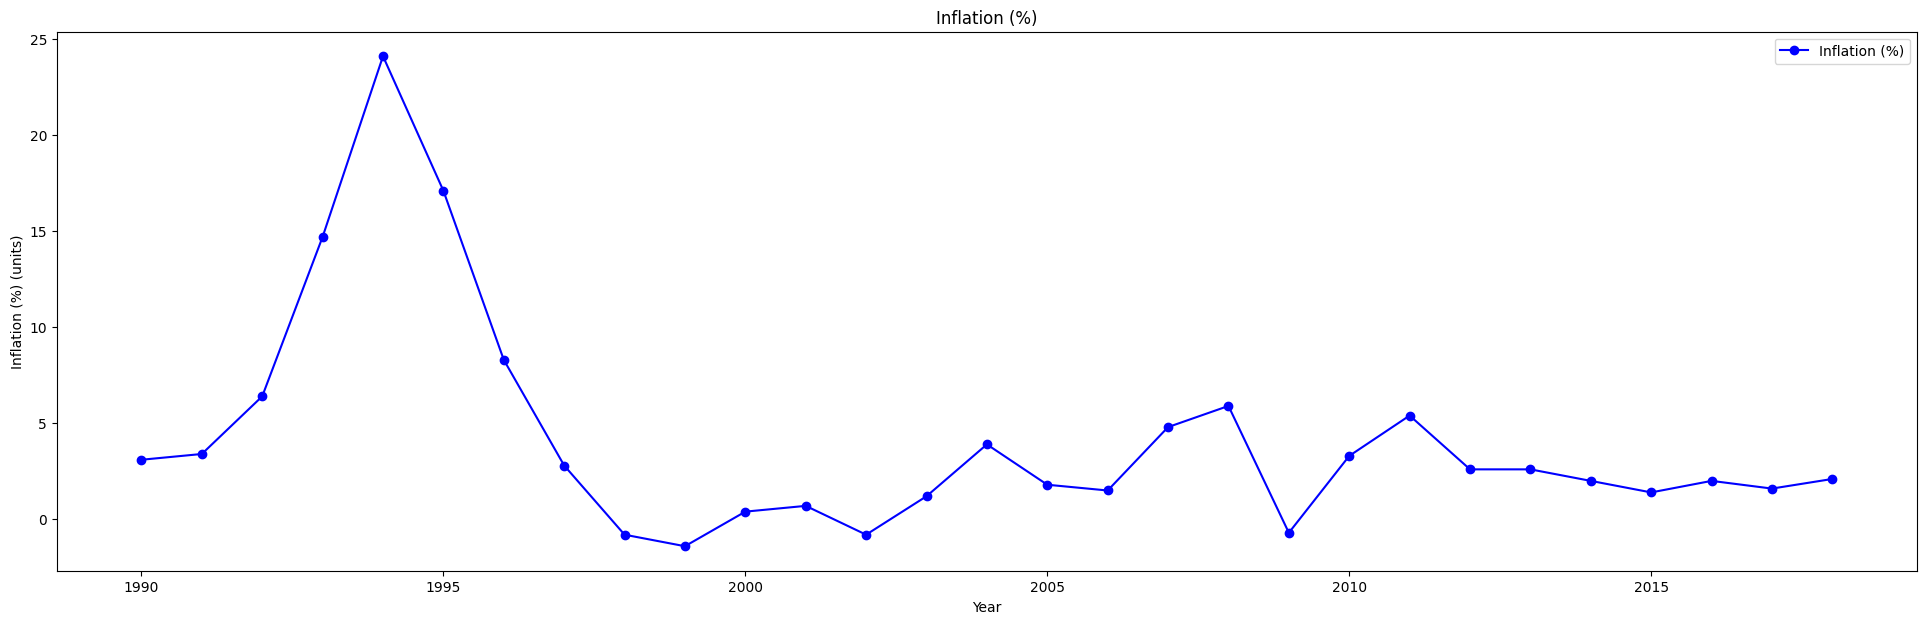

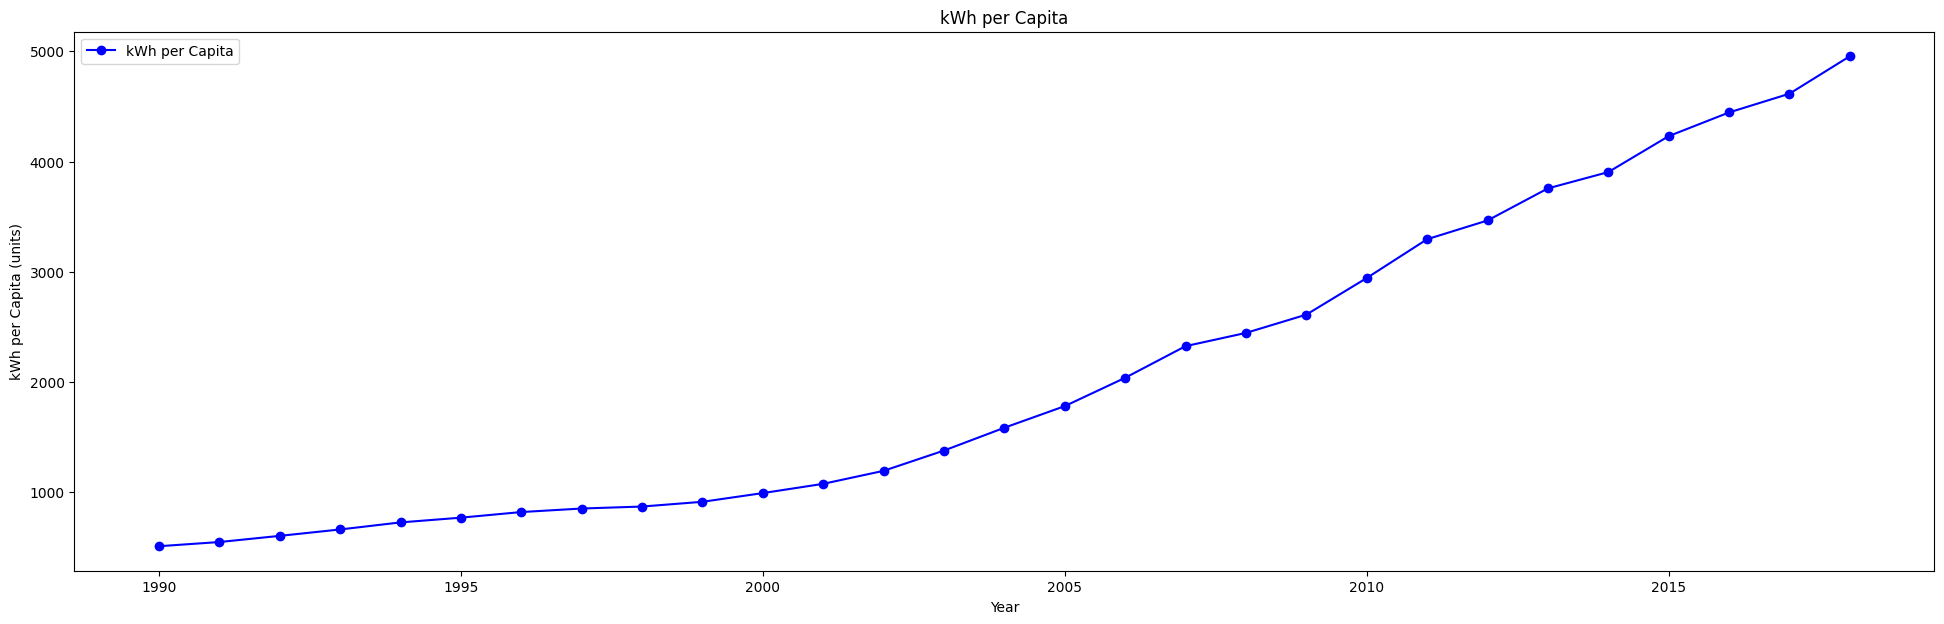

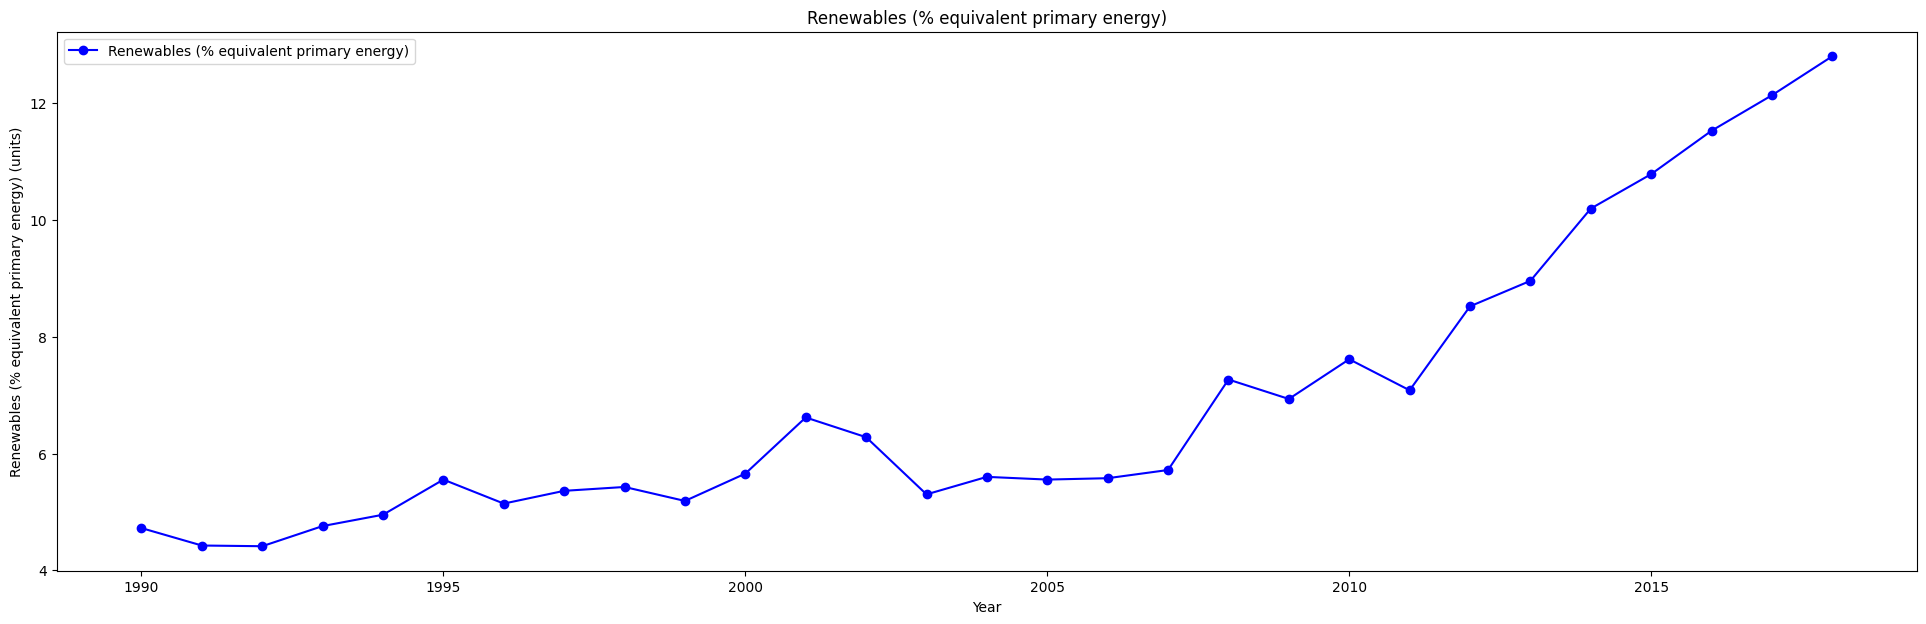

In [3]:
for col in data.columns:
    # create a new figure
    fig, ax = plt.subplots(figsize=(24, 7))
    # plot the column as a line plot with markers
    ax.plot(data.index, data[col], color="blue", marker="o", label=col)
    # set the title, labels, and legend
    ax.set_title(col)
    ax.set_ylabel(f"{col} (units)")
    ax.set_xlabel('Year')
    ax.legend()
    # show the plot
    plt.show()

# FEATURE SELECTION

## Exploring linear correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Kilotons of Co2'),
  Text(1.5, 0, 'Population'),
  Text(2.5, 0, 'GDP (Billions of $US)'),
  Text(3.5, 0, 'GDP Growth (%)'),
  Text(4.5, 0, 'GDP Per Capita (US $)'),
  Text(5.5, 0, 'Inflation (%)'),
  Text(6.5, 0, 'kWh per Capita'),
  Text(7.5, 0, 'Renewables (% equivalent primary energy)')])

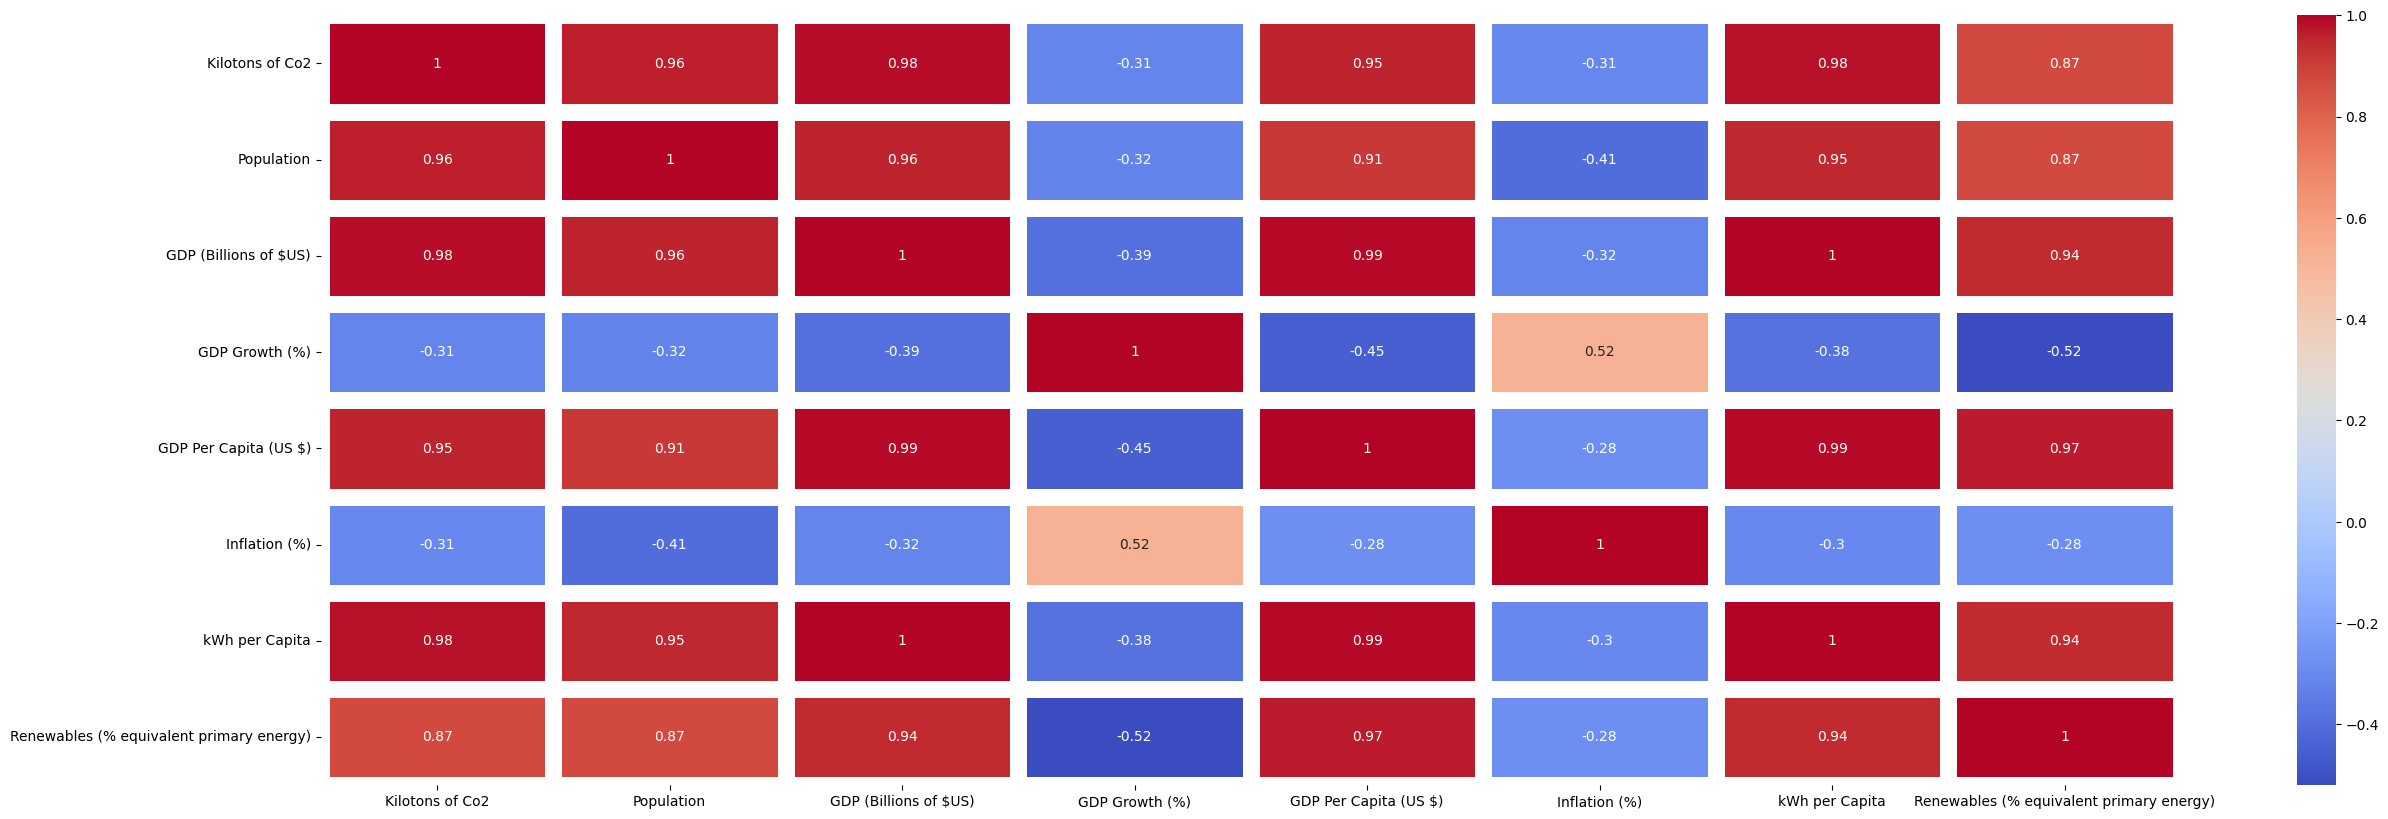

In [4]:
plt.figure(figsize = (30,10)) # Create matplotlib figure
sb.heatmap(data.corr(), annot = True, linewidths=12, fmt=".2g", cmap= 'coolwarm') 
plt.xticks(rotation='horizontal')

In [5]:
# Define input and outputs
Z=data.values
Y=Z[:,0]
X=Z[:,[1,2,3,4,5,6,7]] 

### Filter Methods 

#### kBest 

#### Pearson’s Correlation Coefficient

In [6]:
from sklearn.feature_selection import SelectKBest # selection method
from sklearn.feature_selection import mutual_info_regression,f_regression # score metric

[315.51699425 839.77673506   2.91989392 274.9673811    2.78677145
 697.85499485  85.83680353]


<BarContainer object of 7 artists>

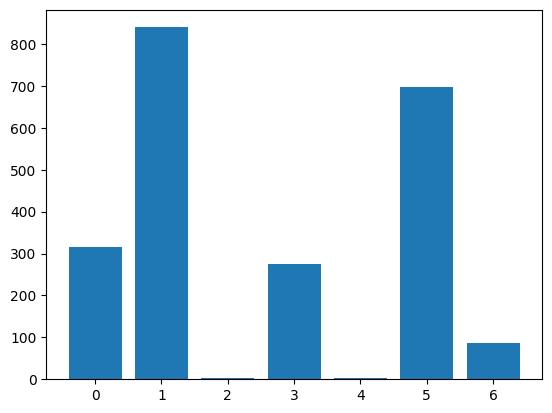

In [7]:
features = SelectKBest(k=2, score_func = f_regression)

fit=features.fit(X,Y) #calculates the scores using the score_function f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

#### Mutual Information

[1.31620796 1.6139937  0.27393649 1.39477019 0.17634674 1.66543048
 0.89934159]


<BarContainer object of 7 artists>

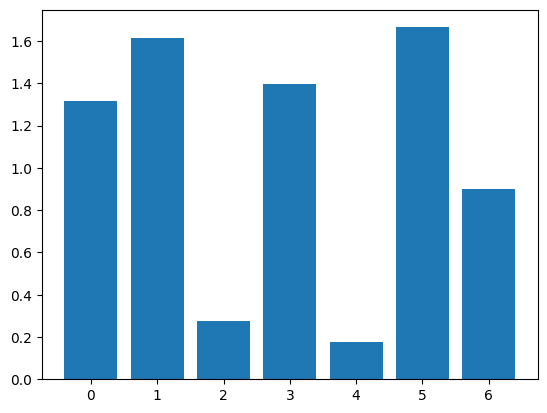

In [8]:
features=SelectKBest(k=3,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA
#features=SelectKBest(k=3,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA

fit=features.fit(X,Y) #calculates the f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

### Wrapper methods 

#### Recursive Feature Elimination (RFE)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [10]:
model=LinearRegression() # LinearRegression Model as Estimator
rfe1=RFE(model,n_features_to_select=1)# using 1 features
rfe2=RFE(model,n_features_to_select=2) # using 2 features
rfe3=RFE(model,n_features_to_select=3)# using 3 features
fit1=rfe1.fit(X,Y)
fit2=rfe2.fit(X,Y)
fit3=rfe3.fit(X,Y)

In [11]:
print( "Feature Ranking (Linear Model, 1 features): %s" % (fit1.ranking_)) 
print( "Feature Ranking (Linear Model, 2 features): %s" % (fit2.ranking_)) 
print( "Feature Ranking (Linear Model, 3 features): %s" % (fit3.ranking_))

Feature Ranking (Linear Model, 1 features): [7 4 2 5 3 6 1]
Feature Ranking (Linear Model, 2 features): [6 3 1 4 2 5 1]
Feature Ranking (Linear Model, 3 features): [5 2 1 3 1 4 1]


### Emsemble methods 

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_)

[0.20367734 0.19780351 0.00839839 0.26429139 0.00199889 0.29736378
 0.0264667 ]


COM BASE NESTES FEATURE SELECTION MÉTODOS CONSEGUIMOS REDUZIR OS FEATURES:

In [14]:
data = data.drop(columns=['Inflation (%)','GDP Growth (%)'])
data

,Kilotons of Co2,Population,GDP (Billions of $US),GDP Per Capita (US $),kWh per Capita,Renewables (% equivalent primary energy)
date,,,,,,
1990,2.173360e+06,1153704252,974.429258,317.8847,511,4.723668
1991,2.302180e+06,1170626171,1086.530756,333.1421,549,4.424778
1992,2.418180e+06,1183813389,1254.764538,366.4607,605,4.412702
1993,2.645410e+06,1195855558,1446.231016,377.3898,663,4.757861
1994,2.767670e+06,1207286675,1651.115180,473.4923,727,4.952474
1995,3.088620e+06,1218144426,1850.763485,609.6567,770,5.553820
1996,3.070510e+06,1228298836,2050.191538,709.4138,821,5.143133
1997,3.134110e+06,1237801448,2255.387151,781.7442,853,5.361734
1998,3.236280e+06,1246836105,2437.344683,828.5805,871,5.427778


# REGRESSION MODEL

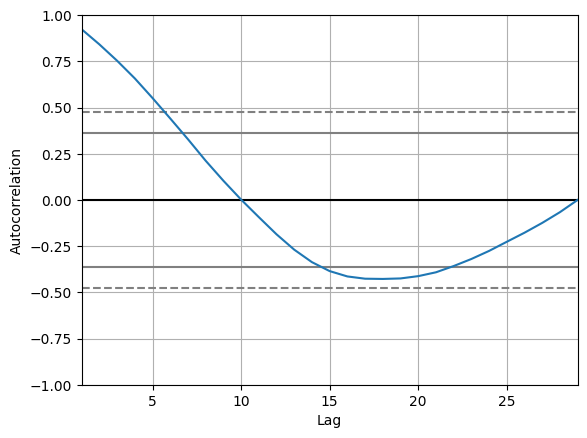

In [15]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(data['Kilotons of Co2'])
plt.show()

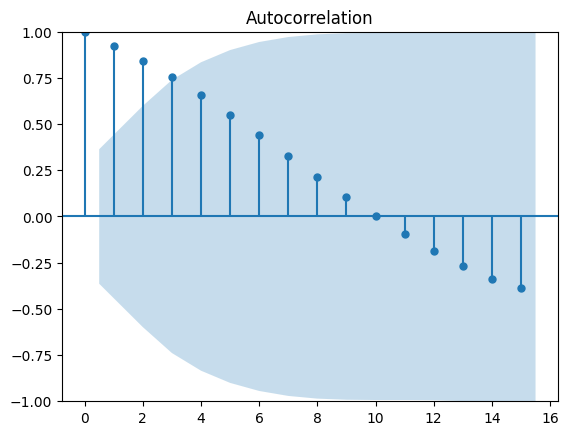

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(data['Kilotons of Co2'])
plt.show()

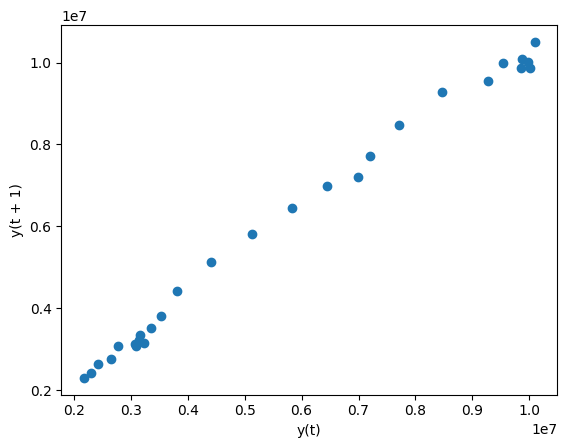

In [17]:
from pandas.plotting import lag_plot
lag_plot(data['Kilotons of Co2'])
plt.show()

## AutoRegressive  Models 

In [18]:
from statsmodels.tsa.ar_model import AutoReg
#from statsmodels.tsa.arima.model import ARIMA

#Identify output Y
Y=data.values[:,0]

split_point = len(Y) - 10
train, test = Y[0:split_point], Y[split_point:]
# train autoregression
window = 5
model = AutoReg(train, lags=window)
#model=ARIMA(train, order=(1, 1,1))
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   19
Model:                     AutoReg(5)   Log Likelihood                -183.269
Method:               Conditional MLE   S.D. of innovations         117204.062
Date:                Thu, 04 May 2023   AIC                            380.537
Time:                        11:43:35   BIC                            385.010
Sample:                             5   HQIC                           380.123
                                   19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.515e+05    2.1e+05     -0.722      0.470   -5.63e+05     2.6e+05
y.L1           1.5556      0.206      7.551      0.000       1.152       1.959
y.L2          -0.0171      0.391     -0.044      0.9

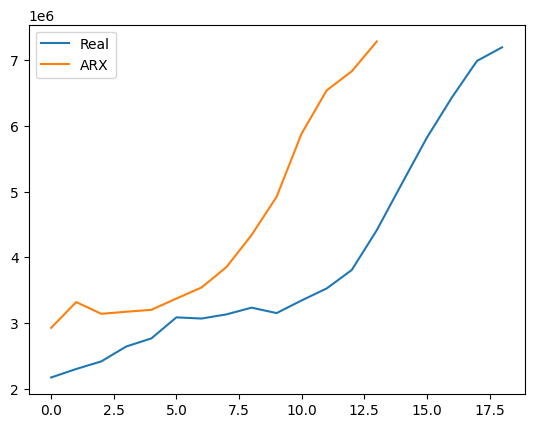

In [19]:
#model_fit.plot_predict()
plt.plot(train,label='Real')
plt.plot(model_fit.fittedvalues,label='ARX')
plt.legend()

#### Testing the ARX model with test data 

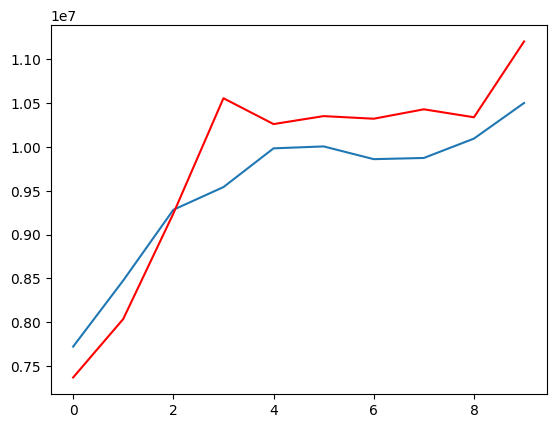

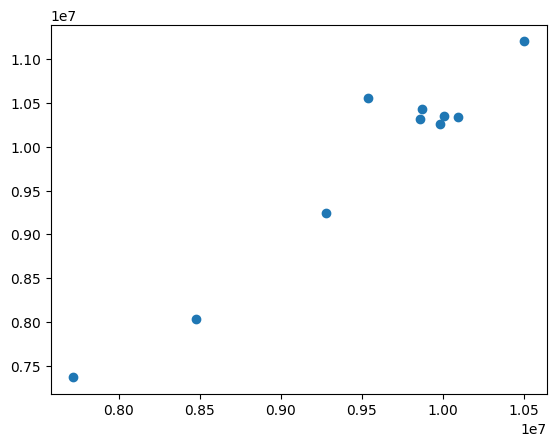

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

plt.scatter(test,predictions)
plt.show()

#### Evaluating the model error 

In [21]:
MAE_AR=metrics.mean_absolute_error(test,predictions) 
MBE_AR=np.mean(test-predictions) #here we calculate MBE
MSE_AR=metrics.mean_squared_error(test,predictions)  
RMSE_AR= np.sqrt(metrics.mean_squared_error(test,predictions))
cvRMSE_AR=RMSE_AR/np.mean(test)
NMBE_AR=MBE_AR/np.mean(test)
print(MAE_AR, MBE_AR,MSE_AR, RMSE_AR,cvRMSE_AR,NMBE_AR)

443964.4643570383 -276740.44109334826 262386267932.44928 512236.53514021164 0.05372489716082344 -0.029025363709973086


### Split Data into training and test data 

In [22]:
#### Create vector with inputs and outputs

In [23]:
#Create matrix from data frame
Z=data.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,5]]
#X2=Z[:,[1,2]]

In [24]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
#print(X_train)
#print(y_train)
train_test_split(X,Y)

[array([[1.18381339e+09, 1.25476454e+03, 3.66460700e+02, 6.05000000e+02,
         4.41270160e+00],
        [1.23780145e+09, 2.25538715e+03, 7.81744200e+02, 8.53000000e+02,
         5.36173400e+00],
        [1.34819137e+09, 9.23266012e+03, 4.55045310e+03, 2.94400000e+03,
         7.61599800e+00],
        [1.33912560e+09, 8.28559379e+03, 3.83223640e+03, 2.61200000e+03,
         6.93553160e+00],
        [1.27273958e+09, 3.19711850e+03, 1.05310820e+03, 1.07700000e+03,
         6.61862400e+00],
        [1.33016715e+09, 7.56224296e+03, 3.46830460e+03, 2.44600000e+03,
         7.26866700e+00],
        [1.41706947e+09, 1.54663300e+04, 9.90534200e+03, 4.95600000e+03,
         1.28073930e+01],
        [1.19585556e+09, 1.44623102e+03, 3.77389800e+02, 6.63000000e+02,
         4.75786070e+00],
        [1.21814443e+09, 1.85076348e+03, 6.09656700e+02, 7.70000000e+02,
         5.55382000e+00],
        [1.39371545e+09, 1.28658004e+04, 8.01643140e+03, 4.23100000e+03,
         1.07874980e+01],
        [1

## Linear Regression 

In [25]:
from sklearn import  linear_model

# Create linear regression object
LR_model = linear_model.LinearRegression()

# Train the model using the training sets
LR_model.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = LR_model.predict(X_test)

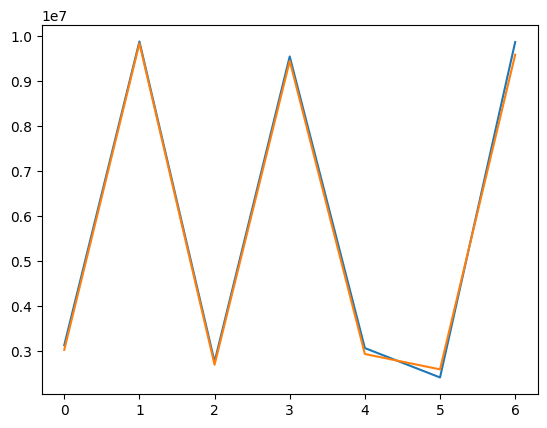

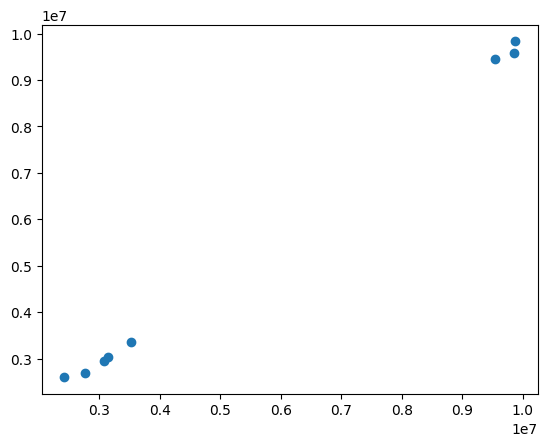

In [26]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [27]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
print(MAE_LR, MBE_LR,MSE_LR, RMSE_LR,cvRMSE_LR,NMBE_LR)

134303.34003691102 89396.07304231805 23024632574.921722 151738.698343309 0.027465770213455105 0.016181317139088436


## Support Vector Regressor

### Scale data 

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [29]:
regr = SVR(kernel='rbf')
#kernel='linear'
#kernel='sigmoid'
#kernel='rbf'

regr.fit(X_train_ss,y_train_ss)

C:\Users\eduar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

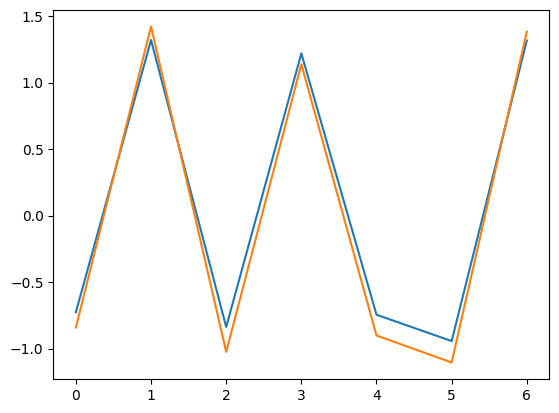

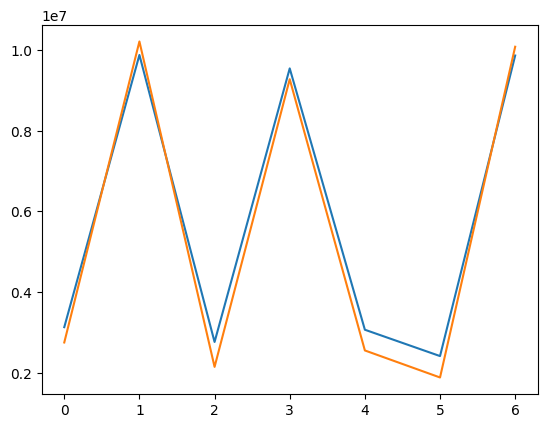

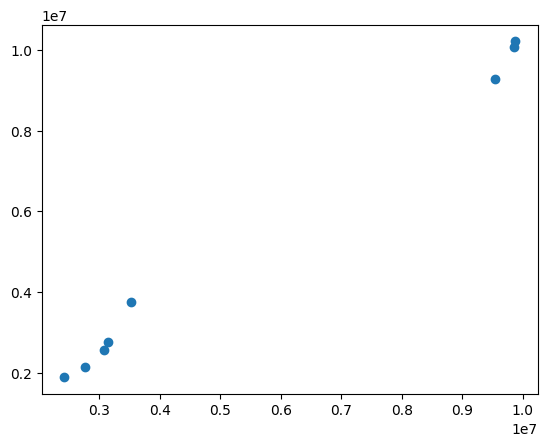

In [30]:
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))#It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [31]:
MAE_SVR=metrics.mean_absolute_error(y_test_SVR,y_pred_SVR) 
MBE_SVR=np.mean(y_test- y_pred_SVR) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test_SVR,y_pred_SVR)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test_SVR,y_pred_SVR))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
print(MAE_SVR, MBE_SVR,MSE_SVR, RMSE_SVR,cvRMSE_SVR,NMBE_SVR)

0.11712100197176731 5524647.543298957 0.015562144001973954 0.12474832264192555 2.258032263098144e-08 1.0000000104869056


## Decision Tree Regressor 

In [32]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor(
#criterion='mse', 
#splitter='best', 
#max_depth=None, 
#min_samples_split=2, 
#min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, 
#max_features=None, 
#random_state=None, 
#max_leaf_nodes=None, 
#min_impurity_decrease=0.0, 
#min_impurity_split=None, 
#presort='deprecated', 
#ccp_alpha=0.0)

# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor()

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

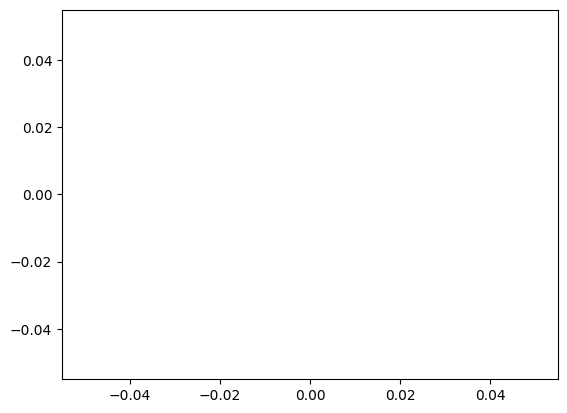

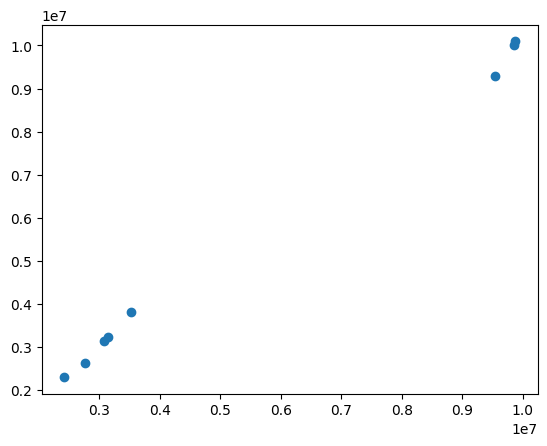

In [33]:
plt.plot(y_test[1000:2000])
plt.plot(y_pred_DT[1000:2000])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [34]:
#Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
print(MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT)

166350.03661249985 -41954.958487499855 32767415278.07086 181017.72089514017 0.03276547895132583 -0.007594142178059163


## Random forest 

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

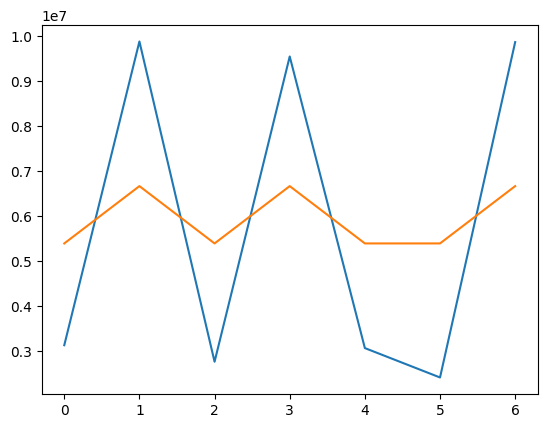

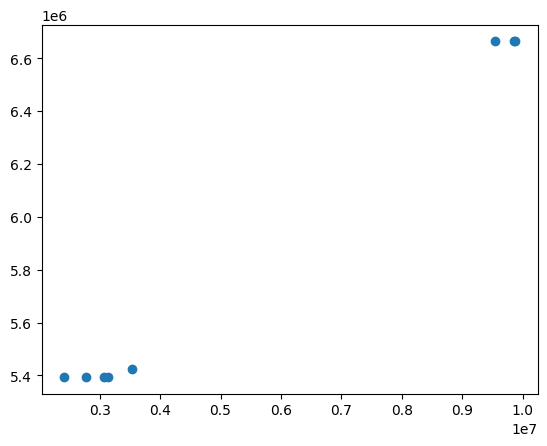

In [37]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [38]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

2669814.0004483676 -41954.958487499855 7327531705531.428 2706941.3930728952 0.489975405715009 -0.007594142178059163


## Uniformized data 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random forest uniformized data 

In [40]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model2 = RandomForestRegressor(**parameters)
RF_model2.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF2 = RF_model2.predict(X_test_scaled)

C:\Users\eduar\AppData\Local\Temp\ipykernel_83620\1225707402.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model2.fit(X_train_scaled, y_train.reshape(-1,1))


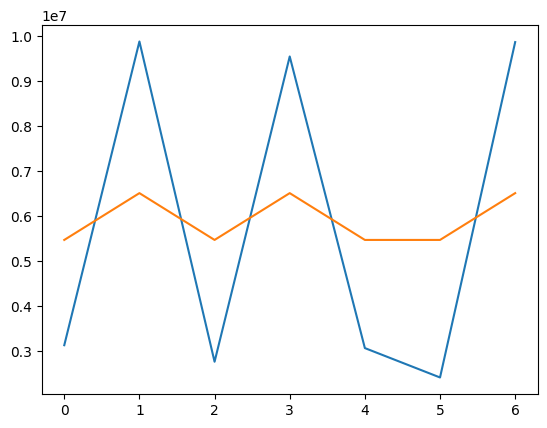

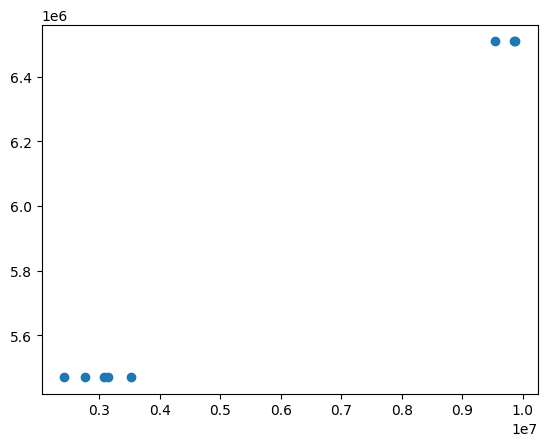

In [41]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF2[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF2)

In [42]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

2669814.0004483676 -41954.958487499855 7327531705531.428 2706941.3930728952 0.489975405715009 -0.007594142178059163


## Gradient Boosting 

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

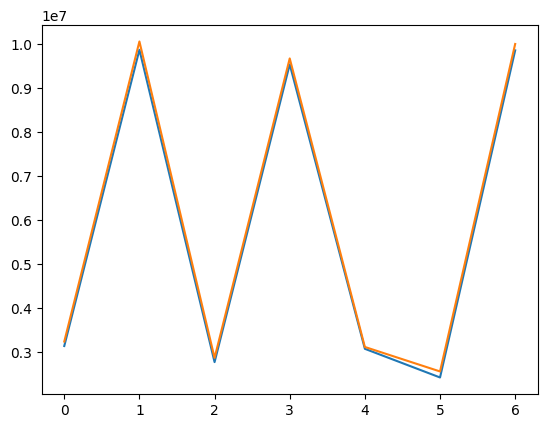

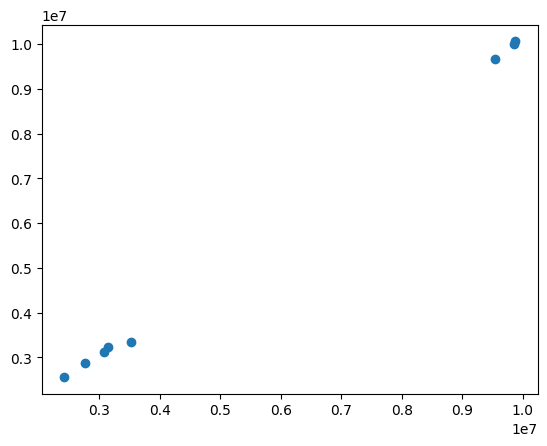

In [44]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [45]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MBE_GB=np.mean(y_test-y_pred_GB)
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
NMBE_GB=MBE_GB/np.mean(y_test)
print(MAE_GB,MBE_GB,MSE_GB,RMSE_GB,cvRMSE_GB,NMBE_GB)

128402.56553215347 -83239.15569437214 18489809215.828735 135977.2378592415 0.024612835157267837 -0.01506687185289441


## Extreme Gradient Boosting 

In [46]:
from xgboost import XGBRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

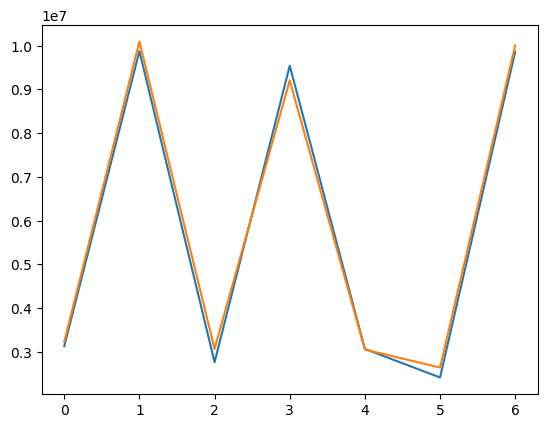

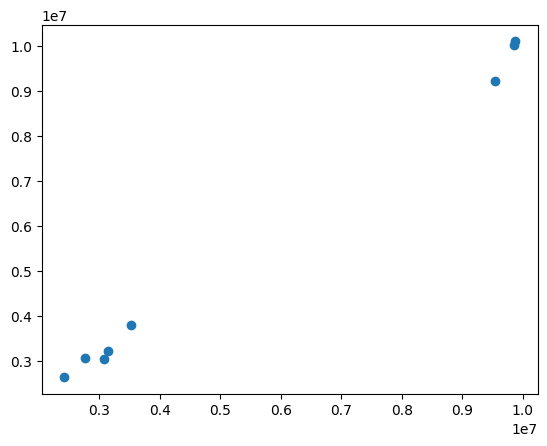

In [47]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [48]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MBE_XGB=np.mean(y_test-y_pred_XGB)
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
NMBE_XGB=MBE_GB/np.mean(y_test)
print(MAE_XGB,MBE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB,NMBE_XGB)

203655.95018749987 -116250.67088749981 51948722852.039185 227922.62470417278 0.04125559600102116 -0.01506687185289441


## Bootstrapping 

In [49]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

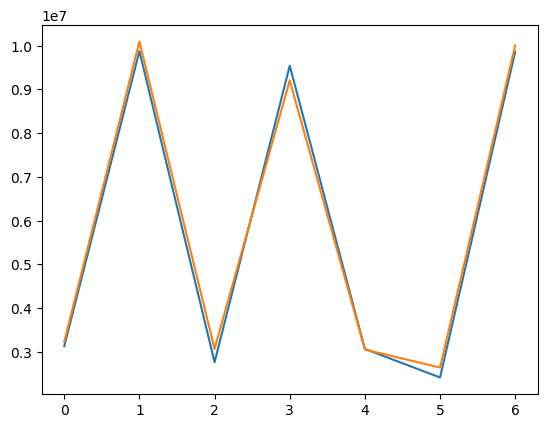

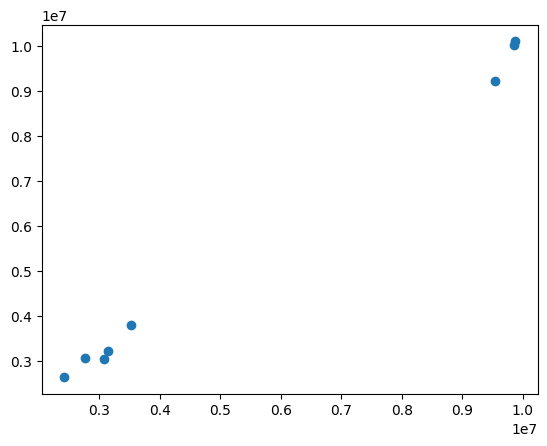

In [50]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [51]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
print(MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT)

113783.36644750001 -72474.61644750001 22505529968.19017 150018.43209482683 0.027154389939321778 -0.013118414639037297


## Neural Networks 

In [52]:
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(hidden_layer_sizes=(5,10,5))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)

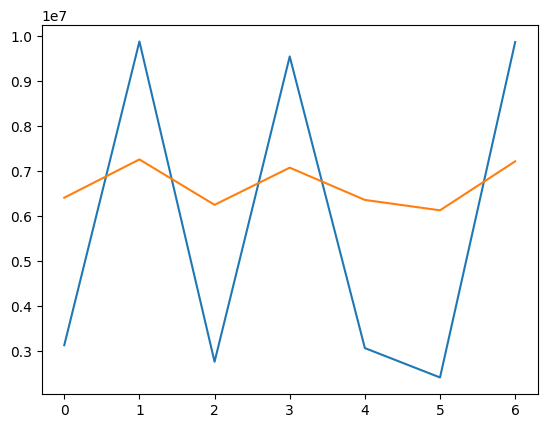

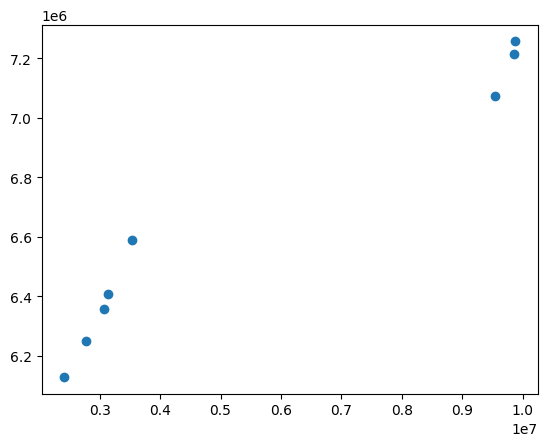

In [53]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [54]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN)
MBE_NN=np.mean(y_test-y_pred_NN)
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
NMBE_NN=MBE_NN/np.mean(y_test)
print(MAE_NN,MBE_NN,MSE_NN,RMSE_NN,cvRMSE_NN,NMBE_NN)

3067872.2364772344 -1135102.1943260673 9588735670870.115 3096568.3701268593 0.5605006253034582 -0.2054614701360602


# Previsão para 2019-2021

## Save model

In [55]:
import pickle

In [56]:
#save LR model
with open('LR_model.pkl','wb') as file:
    pickle.dump(LR_model, file)

In [57]:
data_prev = pd.read_csv('data_clean_china.csv')
data_prev = data_prev.set_index('date')
data_prev = data_prev.loc[2019:2021] #select years that we want to predict
data_prev = data_prev.drop(columns=['Inflation (%)','GDP Growth (%)']) #drop non features
data_prev = data_prev.iloc[:, [0,1,2,3,4,5]] # Change the position of the columns so that Y=column 0 and X all the remainin

data_prev

,Kilotons of Co2,Population,GDP (Billions of $US),GDP Per Capita (US $),kWh per Capita,Renewables (% equivalent primary energy)
date,,,,,,
2019,1.070722e+07,1421864031,16624.523980,10143.8382,5161,13.515960
2020,1.020722e+07,1424929781,17176.865661,10408.6698,5331,14.242872
2021,1.070797e+07,1425893465,19429.069638,12556.3331,5500,14.946244


In [58]:
Z = data_prev.values
X = Z[:,[1,2,3,4,5]] #features selected
y_test = Z[:, 0] #co2 emissions
y_pred_LR = LR_model.predict(X)
y_pred_LR

array([11837331.364958  , 12023524.05118769, 13645222.62375219])

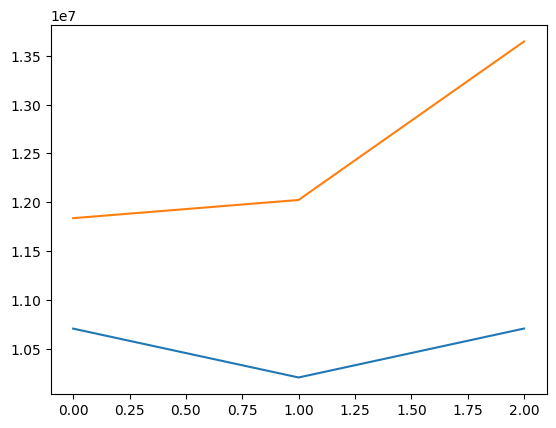

In [59]:
plt.plot(y_test)
plt.plot(y_pred_LR)
plt.show()